# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Timothy Mulya Cahyana
- **Email:** timothymulyacahyana@gmail.com
- **ID Dicoding:** timothymulyacahyana

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Bagaimana pengaruh musim terhadap total penyewaan sepeda?
- **Pertanyaan 2:** Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari?
- **Pertanyaan 3:** Bagaimana tren penyewaan sepeda dari tahun 2011 hingga tahun 2013?

## Import Semua Packages/Library yang Digunakan

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

## **Data Wrangling**

### Gathering Data

In [53]:
day_df = pd.read_csv('https://raw.githubusercontent.com/TimKahyo/RentalBikeDataVisualization/refs/heads/main/data/day.csv')
hour_df = pd.read_csv('https://raw.githubusercontent.com/TimKahyo/RentalBikeDataVisualization/refs/heads/main/data/hour.csv')

**Insight:**
Data terdiri dari dua dataset, yaitu day.csv dan hour.csv yang berisi informasi penyewaan sepeda berdasarkan hari dan jam.

- `day_df` berisi data dari `day.csv` yang memuat informasi penyewaan sepeda berdasarkan hari.
- `hour_df` berisi data dari` hour.csv` yang memuat informasi penyewaan sepeda berdasarkan jam.

### Assessing Data

In [54]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [55]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [56]:
# cek struktur dari dataset
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [57]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [58]:
# cek nilai kosong dari day_df
day_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [59]:
# cek nilai kosog dari hour_df
hour_df.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [60]:
# cek duplikat
day_df.duplicated().sum()

0

In [61]:
hour_df.duplicated().sum()

0

**Insight:**
- Tidak ada duplikat
- Tidak ada kolom yang kosong
- Tipe data `dteday` tidak sesuai

### Cleaning Data

In [62]:
# Konversi 'dteday' menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Verifikasi perubahan
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [63]:
# Konversi 'dteday' menjadi tipe datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Verifikasi perubahan
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [64]:
# menggabungkan kedua data
merged_df = pd.merge(hour_df, day_df[['dteday', 'cnt']], on='dteday', how='left')

# cek perubahan
merged_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_x,cnt_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,985


In [65]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt_x       17379 non-

**Insight:**
- merubah tipe data pada kolom `dteday` pada `day_df` dan `hour_df`
- menggabungkan data menjadi satu data agar lebih mudah untuk diolah

## Exploratory Data Analysis (EDA)

### Explore merged dataset

In [66]:
merged_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt_x,cnt_y
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,4533.692963
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,22.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,3214.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,4563.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,5986.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,8714.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,1917.376947


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt_x'}>,
        <Axes: title={'center': 'cnt_y'}>, <Axes: >, <Axes: >]],
      dtype=object)

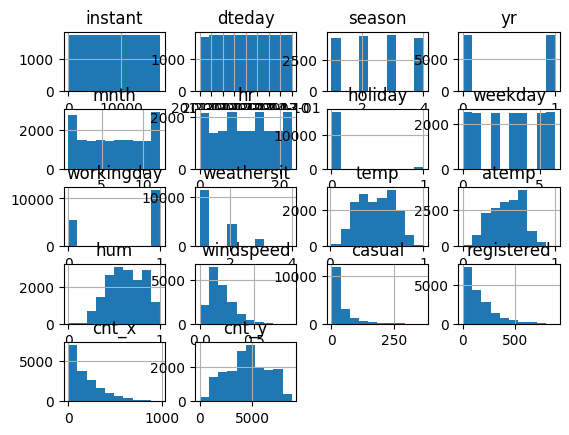

In [67]:
merged_df.hist()

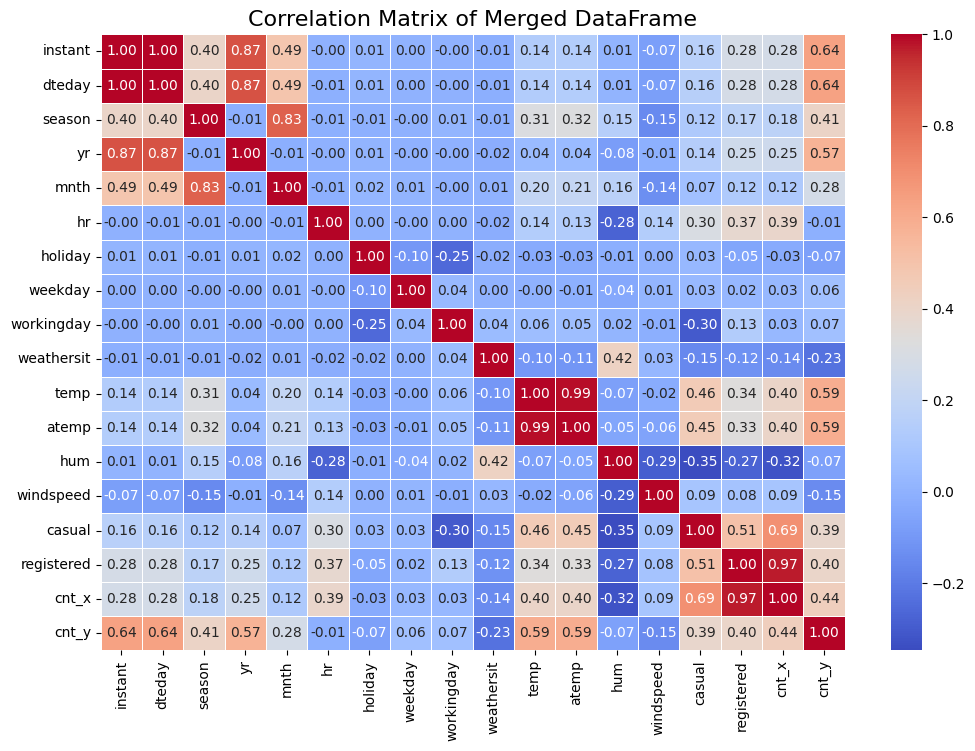

In [68]:
# membuat matriks korelasi
corr_matrix = merged_df.corr()

# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Merged DataFrame', fontsize=16)
plt.show()

**Insight:**
- Korelasi positif dapat dilihat diantara beberapa kolom berikut: instant, dteday, season, yr, mnth, cnt_y(total peyewa dalam sehari), dan cnt_x(total penyewa per jam)


## Visualization & Explanatory Analysis

In [69]:
# memilih kolom-kolom yang memiliki korelasi yang signifikan dari satu dengan lainnya
grouped_df = merged_df.groupby(['dteday', 'season', 'yr', 'mnth', 'hr'])['cnt_x'].sum().reset_index()
grouped_df.rename(columns={'cnt_x': 'total_rentals'}, inplace=True)
grouped_df

,dteday,season,yr,mnth,hr,total_rentals
0,2011-01-01,1,0,1,0,16
1,2011-01-01,1,0,1,1,40
2,2011-01-01,1,0,1,2,32
3,2011-01-01,1,0,1,3,13
4,2011-01-01,1,0,1,4,1
...,...,...,...,...,...,...
17374,2012-12-31,1,1,12,19,119
17375,2012-12-31,1,1,12,20,89
17376,2012-12-31,1,1,12,21,90
17377,2012-12-31,1,1,12,22,61


### Pertanyaan 1: Bagaimana pengaruh musim terhadap total penyewaan sepeda?



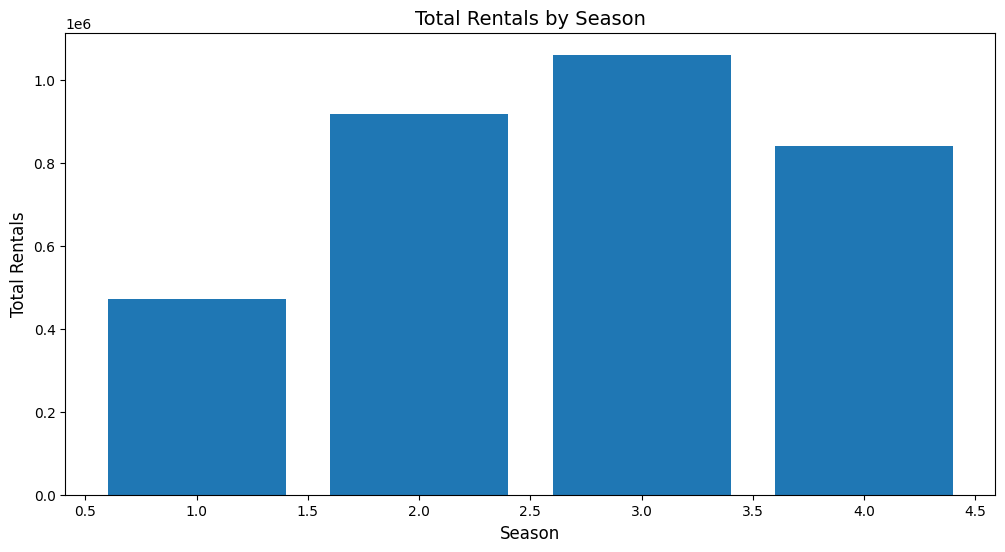

In [70]:
# menghitung total penyewaan sepeda per musim dan menampilkannya pada plot
seasonal_rentals = grouped_df.groupby('season')['total_rentals'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(seasonal_rentals['season'], seasonal_rentals['total_rentals'])
plt.title('Total Rentals by Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.show()

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berdasarkan waktu dalam sehari?

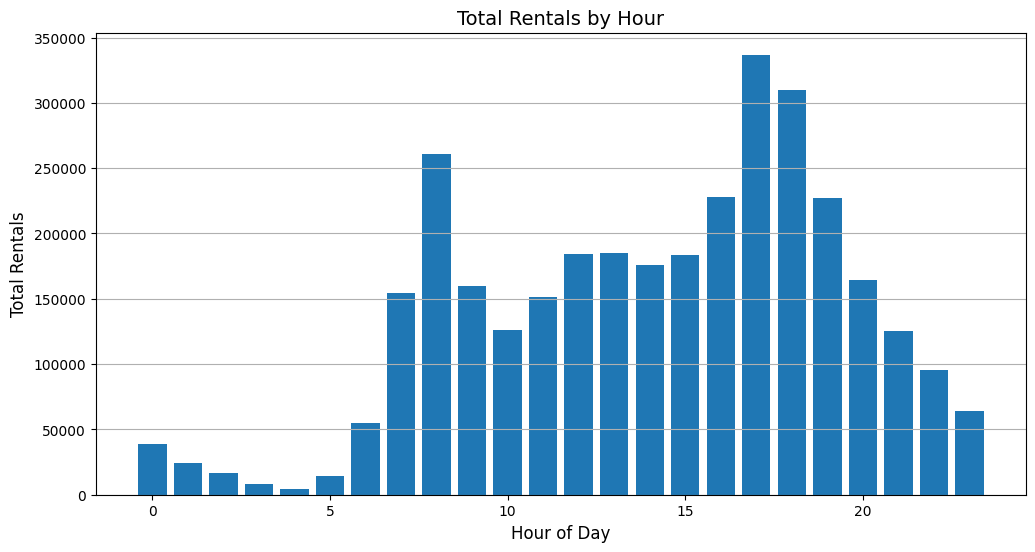

In [71]:
# menghitung total rentals per jam dan menyajikannya pada plot
hourly_rentals = grouped_df.groupby('hr')['total_rentals'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(hourly_rentals['hr'], hourly_rentals['total_rentals'])
plt.title('Total Rentals by Hour', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.grid(axis='y')
plt.show()

## Pertanyaan 3: Bagaimana tren penyewaan sepeda dari tahun 2011 hingga tahun 2013?

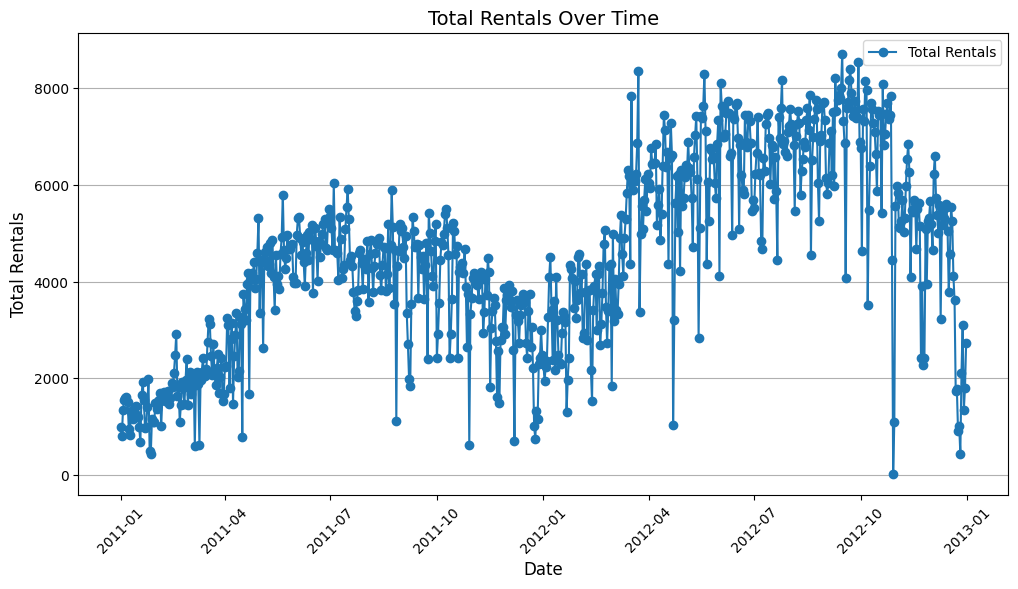

In [72]:
# menghitung total rental per hari dan menyajikannya dalam plot
daily_rentals = grouped_df.groupby('dteday')['total_rentals'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_rentals['dteday'], daily_rentals['total_rentals'], marker='o', label='Total Rentals')
plt.title('Total Rentals Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Rentals', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()

**Insight:**
1. Musim yang memiliki jumlah penyewaan terbanyak ada pada musim ke 3
2. Lalu total penyewaan terbanyak ada di sekitar jam 5
3. Tren selama 2 tahun itu fluktuatif, tetapi cenderung naik pada setiap pertengahan tahun

## Analisis Lanjutan (Opsional)

## Conclusion

- Konklusi pertanyaan 1: Musim yang memiliki jumlah penyewaan terbanyak ada pada musim 3 atau musim gugur.
- Konklusi pertanyaan 2: Pola penyewaan terbanyak sehari-hari ada pada saat jam 8 pagi, dan jam 5 sore.
- Konklusi pertanyaan 3: Biasanya ada tren peningkatan penyewaan pada bulan April, tren ini biasanya berlangsung sampai bulan Oktober.


In [73]:
# menyimpan merged dataset
from google.colab import drive
drive.mount('/content/drive')

csv_file_path = '/content/drive/MyDrive/Bangkit Academy/dataset/merged.csv'
merged_df.to_csv(csv_file_path, index=False)
print(f'DataFrame downloaded as {csv_file_path}')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame downloaded as /content/drive/MyDrive/Bangkit Academy/dataset/merged.csv
